In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0.5, 1]]).T # (n_samples, n_features) (3, 1)
y = np.array([[0, 1, 0]]).T # (n_samples, n_output) (3, 1)

# Initialize Weights - 1 input, 1 hidden layer with 2 neurons, 1 output
n_hidden = 5
W1 = np.random.randn(1, n_hidden) # (n_features, n_hidden) (1, 2)
b1 = np.zeros((1, n_hidden)) # (1, n_hidden) (1, 2)
W2 = np.random.randn(n_hidden, 1) # (n_hidden, n_output)
b2 = np.zeros((1, 1)) # (1, n_output)

In [3]:
def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return (x > 0).astype(int)

def mse_loss(y_pred, y):
    return np.mean((y_pred - y) ** 2)

def d_mse(y_pred, y):
    return (2 / y.shape[0]) * (y_pred - y)   # (3,1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

In [4]:
def forward_pass(X, W1, b1, W2, b2):
    z1 = X @ W1 + b1   # (3,2)
    a1 = relu(z1)      # (3,2)
    y_pred = a1 @ W2 + b2   # (3,1)
    return y_pred, z1, a1

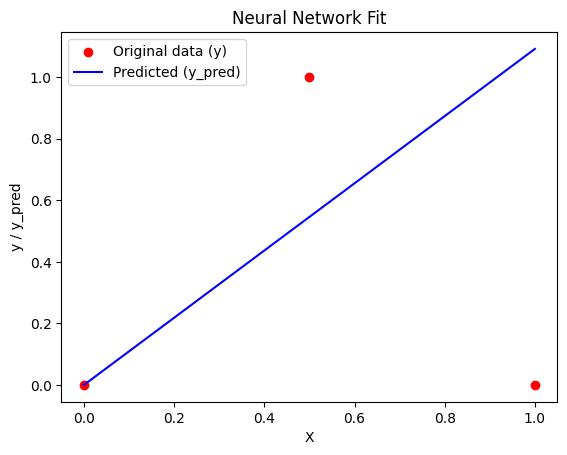

In [5]:
# After training loop
y_pred, _, _ = forward_pass(X, W1, b1, W2, b2)

# Plot original data points
plt.scatter(X, y, color="red", label="Original data (y)")

# Plot predictions
plt.plot(X, y_pred, color="blue", label="Predicted (y_pred)")

plt.xlabel("X")
plt.ylabel("y / y_pred")
plt.legend()
plt.title("Neural Network Fit")
plt.show()

In [6]:
def backward_pass(X, y, y_pred, z1, a1, W2):
    dL_dypred = d_mse(y_pred, y)

    dL_dW2 = a1.T @ dL_dypred        # (2, n) @ (n, 1) -> (2, 1)
    dL_db2 = np.sum(dL_dypred, axis=0, keepdims=True)  # (1,1)

    # Backprop into hidden layer
    dL_da1 = dL_dypred @ W2.T        # (n,1) @ (1,2) -> (n,2)}
    dL_dz1 = dL_da1 * d_relu(z1)     # (n,2) * (n,2)

    # Gradients for W1, b1
    dL_dW1 = X.T @ dL_dz1            # (1,n) @ (n,2) -> (1,2)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)  # (1,2)

    return dL_dW1, dL_db1, dL_dW2, dL_db2

In [7]:
iteration = 1500
for _ in range(iteration):
    # Run forward
    y_pred, z1, a1 = forward_pass(X, W1, b1, W2, b2)
    
    # Run backward
    dW1, db1, dW2, db2 = backward_pass(X, y, y_pred, z1, a1, W2)

    learning_rate = 0.1

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # if _ % 10 == 0:
    #     print(f"Iteration {_}, Loss: {mse_loss(y_pred, y):.4f}")

In [8]:
y_pred

array([[4.67332211e-10],
       [9.99999999e-01],
       [2.97559210e-10]])

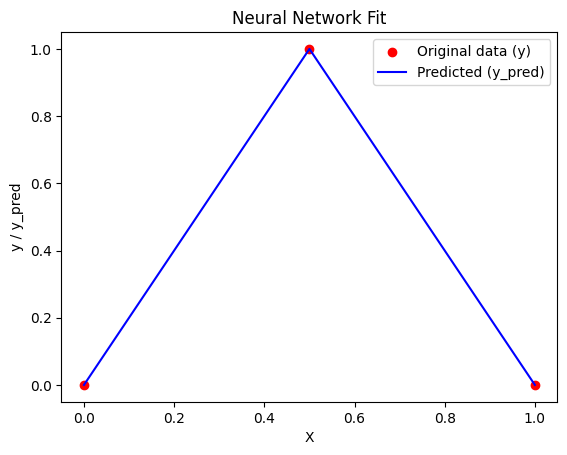

In [9]:
# Plot original data points
plt.scatter(X, y, color="red", label="Original data (y)")

# Plot predictions
plt.plot(X, y_pred, color="blue", label="Predicted (y_pred)")

plt.xlabel("X")
plt.ylabel("y / y_pred")
plt.legend()
plt.title("Neural Network Fit")
plt.show()